In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [2]:
data = pd.read_csv('data/HDFC.csv')
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data

C:\Users\shory\AppData\Local\Temp\ipykernel_9300\3974031942.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])


,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
0,HDFC,EQ,1128.25,1131.35,1110.15,1115.30,1115.50,1125.75,4842266,5.401148e+09,2016-03-30,148632
1,HDFC,EQ,1111.00,1118.95,1098.00,1105.60,1107.00,1115.30,9556036,1.056822e+10,2016-03-31,175689
2,HDFC,EQ,1100.00,1117.80,1092.25,1113.40,1115.20,1105.60,3894156,4.295293e+09,2016-04-01,136099
3,HDFC,EQ,1122.50,1124.25,1095.60,1103.70,1099.50,1113.40,3275522,3.619460e+09,2016-04-04,88687
4,HDFC,EQ,1102.00,1111.00,1085.50,1103.45,1098.15,1103.70,4368286,4.816386e+09,2016-04-05,94052
...,...,...,...,...,...,...,...,...,...,...,...,...
1707,HDFC,EQ,2615.00,2698.00,2609.95,2694.65,2696.05,2613.30,4067801,1.083496e+10,2023-02-03,167965
1708,HDFC,EQ,2692.00,2707.70,2671.55,2683.15,2684.40,2694.65,2364396,6.352097e+09,2023-02-06,151422
1709,HDFC,EQ,2684.40,2694.90,2654.00,2679.20,2680.65,2683.15,2494047,6.680941e+09,2023-02-07,105225
1710,HDFC,EQ,2676.35,2704.00,2675.00,2685.80,2679.00,2679.20,2202728,5.923950e+09,2023-02-08,115455


In [3]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

In [18]:
def plot_trend(forecast1, forecast2, forecast3, title):
  plt.figure(figsize=(10,10))
  plt.plot(train['TIMESTAMP'], train['CLOSE'], label='Train')
  plt.plot(test['TIMESTAMP'], test['CLOSE'], label='Test')
  plt.plot(test['TIMESTAMP'], forecast1, label='SimpleExpSmoothing', color = 'black')
  plt.plot(test['TIMESTAMP'], forecast2, label='Holt-Trend', color = 'r')
  plt.plot(test['TIMESTAMP'], forecast3, label='Holt-Seasonality', color = 'grey')
  
  plt.title(title)
  plt.grid(True)
  plt.legend()
  plt.xlabel('DATE')
  plt.ylabel('CLOSE PRICE')
  
  return plt.show()


In [5]:
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['CLOSE']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

In [6]:
import numpy as np
# Grid Search for Holt's Linear Trend Model
best_alpha, best_beta = 0, 0
best_sse = float('inf')

for alpha in np.arange(0.1, 1.0, 0.1):
    for beta in np.arange(0.1, 1.0, 0.1):
        model_holt = Holt(train['CLOSE'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
        forecasts_holt = model_holt.forecast(len(test))
        sse = np.sum((forecasts_holt - test['CLOSE']) ** 2)
        if sse < best_sse:
            best_sse = sse
            best_alpha, best_beta = alpha, beta
            
# Fit Holt's trend model and get forecasts
model_holt = Holt(train['CLOSE'], damped_trend=True).fit(optimized=True, smoothing_level = best_alpha, smoothing_trend = best_beta)
forecasts_holt = model_holt.forecast(len(test))

C:\Users\shory\AppData\Local\Temp\ipykernel_9300\1211701387.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['CLOSE'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
C:\Users\shory\AppData\Local\Temp\ipykernel_9300\1211701387.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['CLOSE'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
C:\Users\shory\AppData\Local\Temp\ipykernel_9300\1211701387.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['CLOSE'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
C:\Users\shory\AppData\Local\Temp\ipykernel_9300\1211701387.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['CLOSE'], damped_trend=True).fit(s

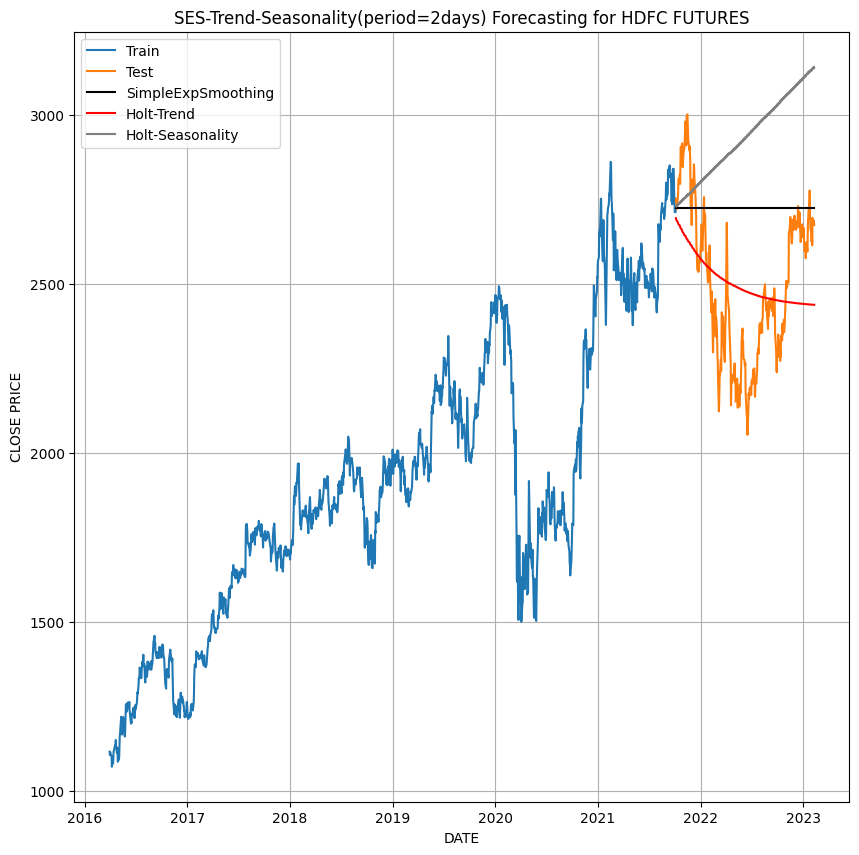

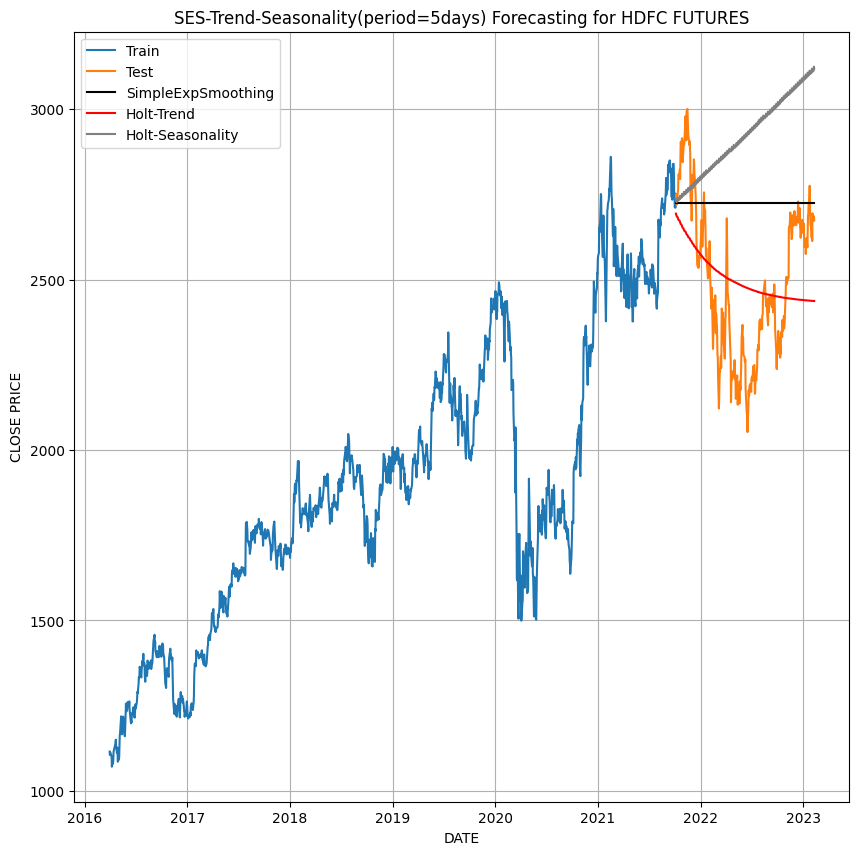

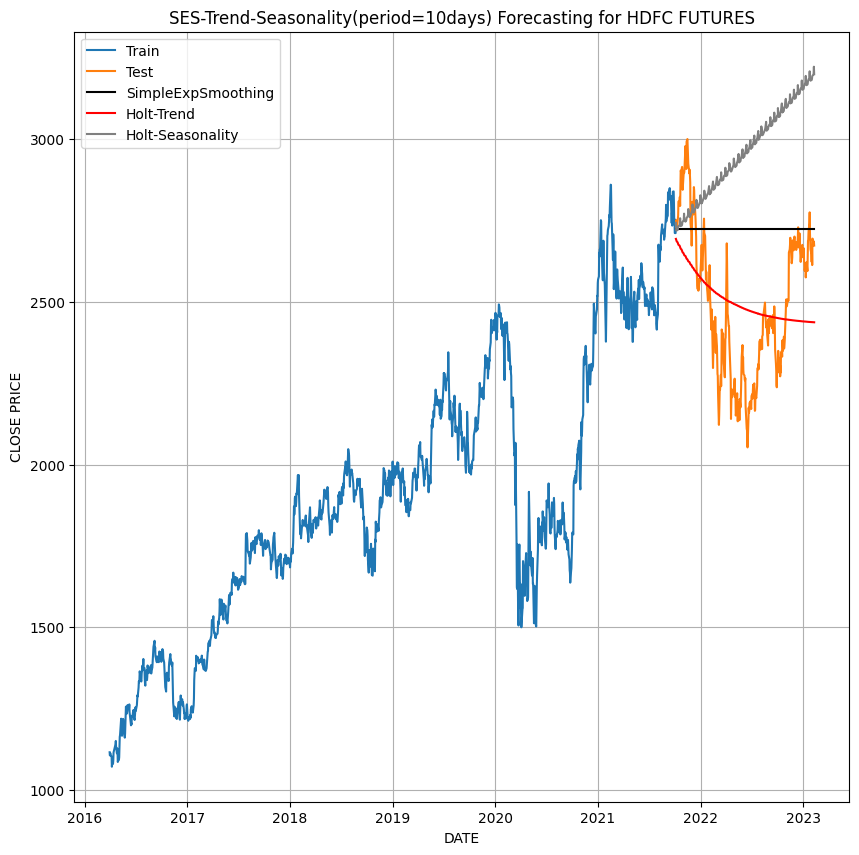

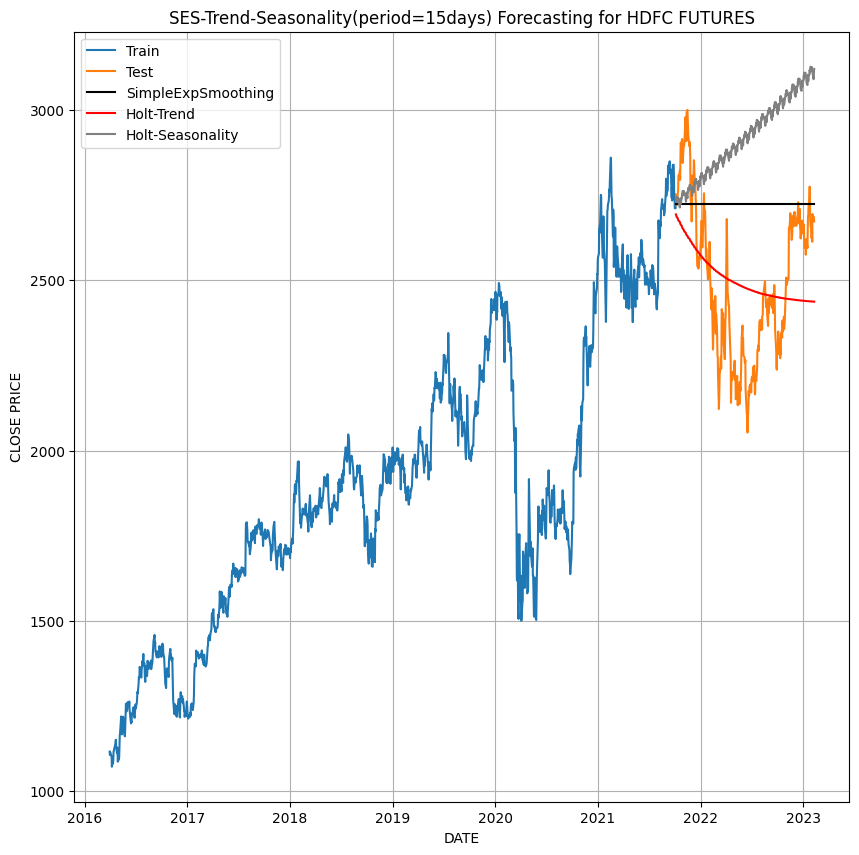

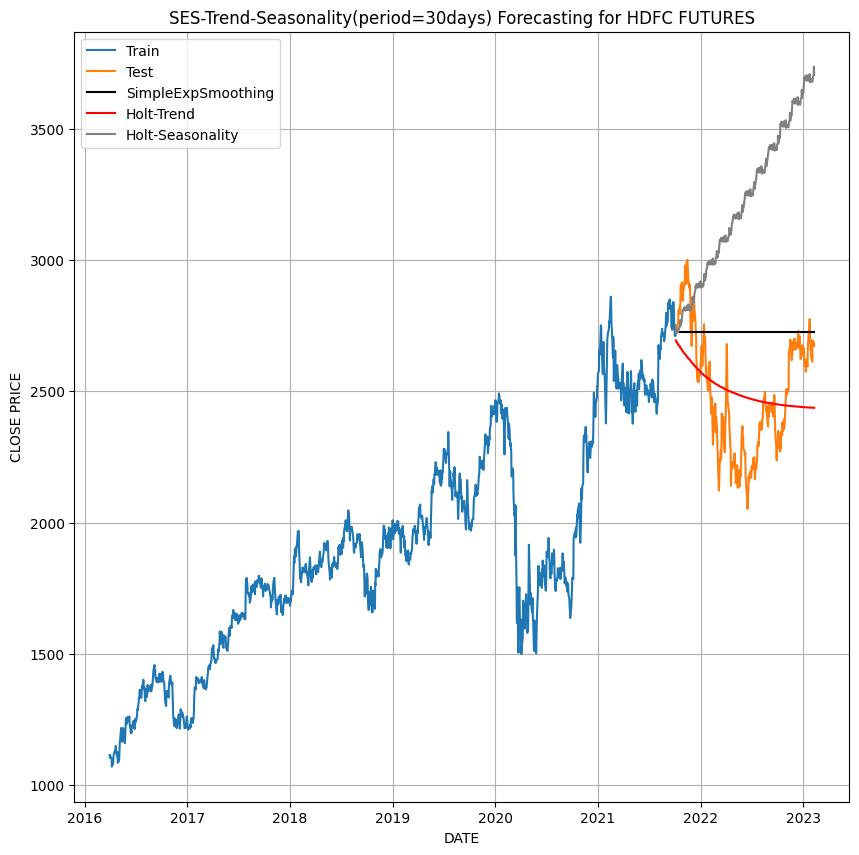

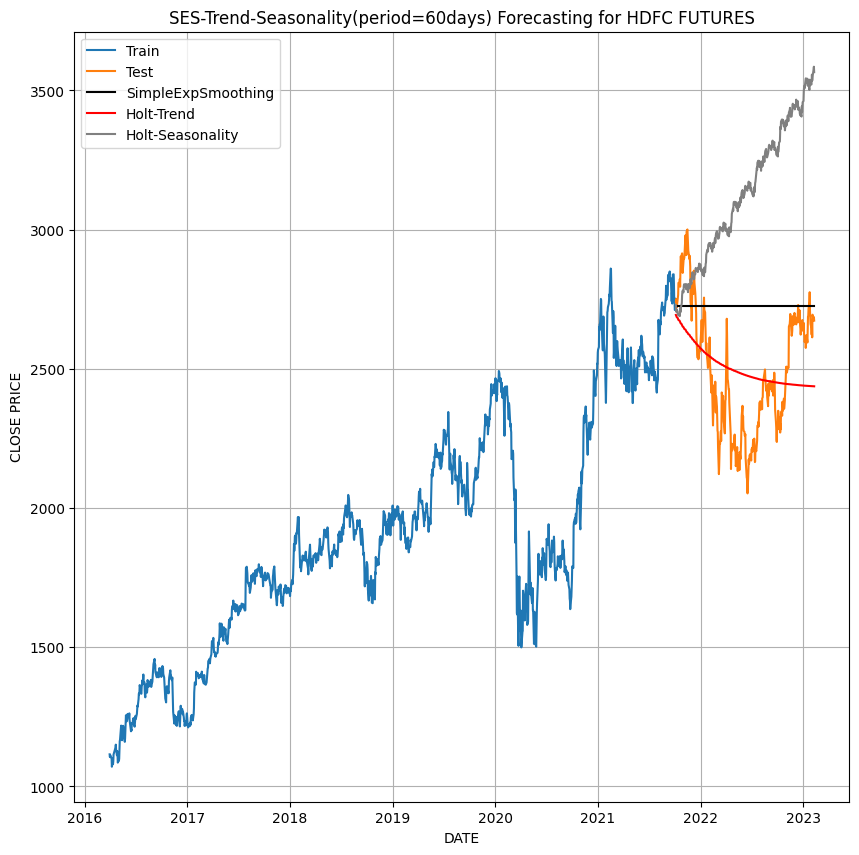

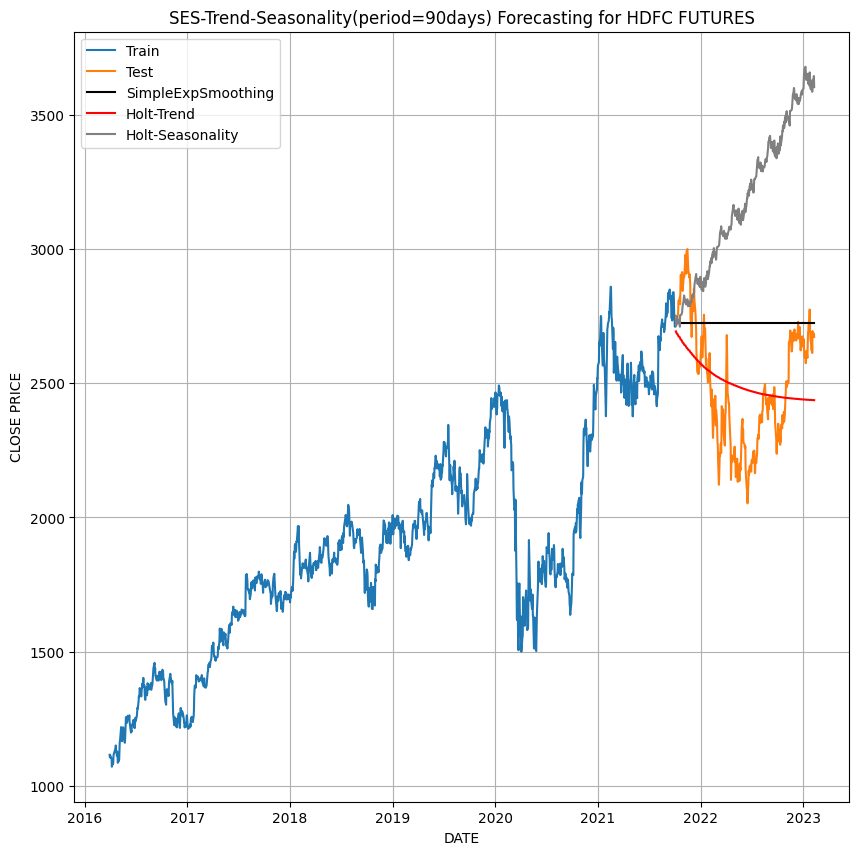

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


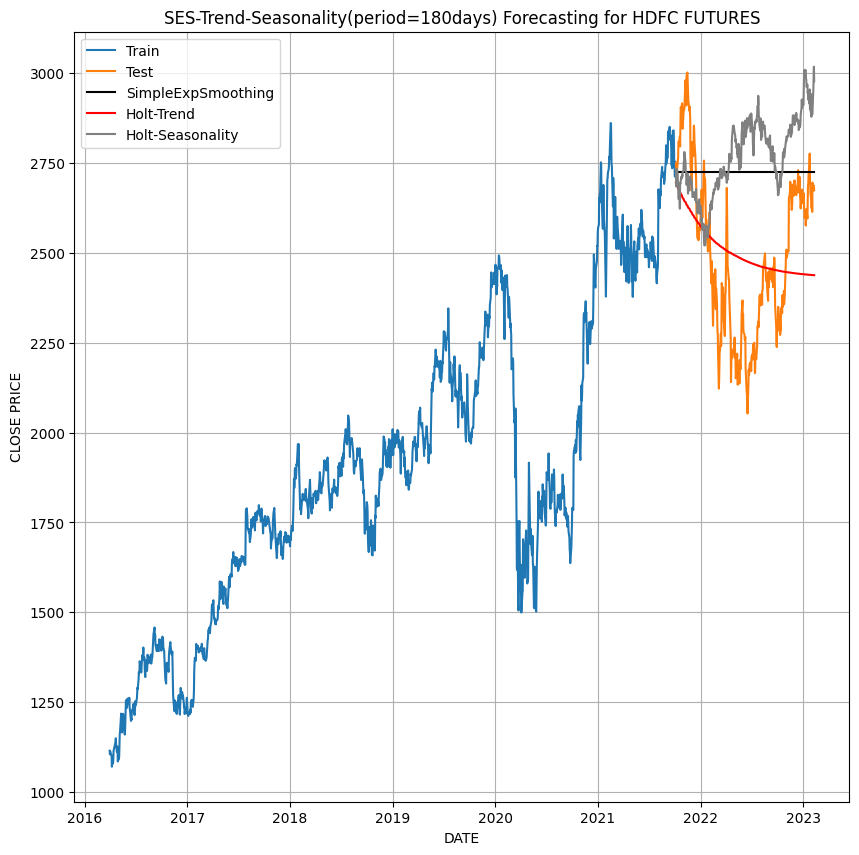

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


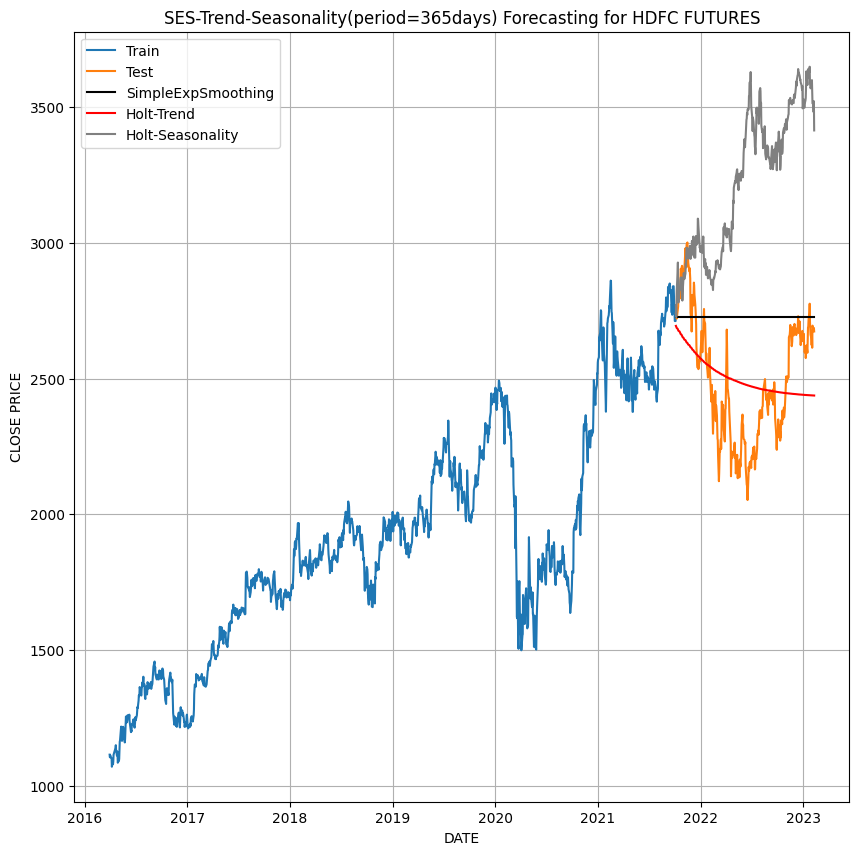

In [19]:
# Fit Holt seasonality model and get forecasts
periods = [2,5,10,15,30,60,90,180,365] 

for period in periods:
  model_holt_season = ExponentialSmoothing(train['CLOSE'], trend='add',
                                            seasonal='mul', seasonal_periods = period).fit(optimized=True)
  forecasts_holt_season = model_holt_season.forecast(len(test))
  plot_trend(forecasts_simple,forecasts_holt,forecasts_holt_season,f"SES-Trend-Seasonality(period={period}days) Forecasting for HDFC FUTURES")

In [13]:
model_simple.summary()

Dep. Variable:,CLOSE,No. Observations:,1370
Model:,SimpleExpSmoothing,SSE,1777828.912
Optimized:,True,AIC,9824.622
Trend:,None,BIC,9835.067
Seasonal:,None,AICC,9824.652
Seasonal Periods:,None,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,15:09:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9812642,alpha,True
initial_level,1115.3000,l.0,False


In [14]:
model_holt.summary()

Dep. Variable:,CLOSE,No. Observations:,1370
Model:,Holt,SSE,2903324.763
Optimized:,True,AIC,10502.557
Trend:,Additive,BIC,10528.670
Seasonal:,None,AICC,10502.640
Seasonal Periods:,None,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,15:09:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
smoothing_trend,0.8000000,beta,False


In [15]:
model_holt_season.summary()

Dep. Variable:,CLOSE,No. Observations:,1370
Model:,ExponentialSmoothing,SSE,1739352.708
Optimized:,True,AIC,9978.647
Trend:,Additive,BIC,10469.568
Seasonal:,Multiplicative,AICC,9993.277
Seasonal Periods:,90,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,15:09:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9596423,alpha,True
smoothing_trend,0.0001002,beta,True
